In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/Users/ernestgaisie/Desktop/heart-disease-prediction/cleaning/cleaned_heart_data.csv")

# Step 1: Identify categorical and numerical columns
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
                       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
numerical_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Step 2: One-Hot Encode Categorical Variables
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# View the first few rows to confirm encoding
print(data_encoded.head())

# Step 3: Save preprocessed data (optional)
data_encoded.to_csv("encoded_dataset.csv", index=False)

   HeartDisease    BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking_1  \
0             0  16.60               3            30          5      False   
1             0  20.34               0             0          7      False   
2             0  26.58              20            30          8      False   
3             0  24.21               0             0          6      False   
4             0  23.71              28             0          8      False   

   Smoking_2  Smoking_3  AlcoholDrinking_Yes  Stroke_Yes  ...  Diabetic_2  \
0      False       True                False       False  ...       False   
1      False      False                False        True  ...       False   
2      False       True                False       False  ...       False   
3      False      False                False       False  ...       False   
4      False      False                False       False  ...       False   

   Diabetic_3  PhysicalActivity_Yes  GenHealth_2  GenHealth_3  GenHe

Correlations with HeartDisease:

HeartDisease                          1.000000
Stroke_Yes                            0.187325
DiffWalking_Yes                       0.176038
Diabetic_1                            0.161624
PhysicalHealth                        0.146818
KidneyDisease_Yes                     0.125145
GenHealth_2                           0.122301
AgeCategory_80+                       0.121366
Smoking_3                             0.096112
AgeCategory_75-79                     0.083434
SkinCancer_Yes                        0.073150
Sex_1                                 0.070171
AgeCategory_70-74                     0.068852
Race_White                            0.062936
BMI                                   0.039665
Asthma_Yes                            0.032434
AgeCategory_65-69                     0.031633
Smoking_1                             0.028421
MentalHealth                          0.026589
GenHealth_3                           0.018011
AgeCategory_60-64          

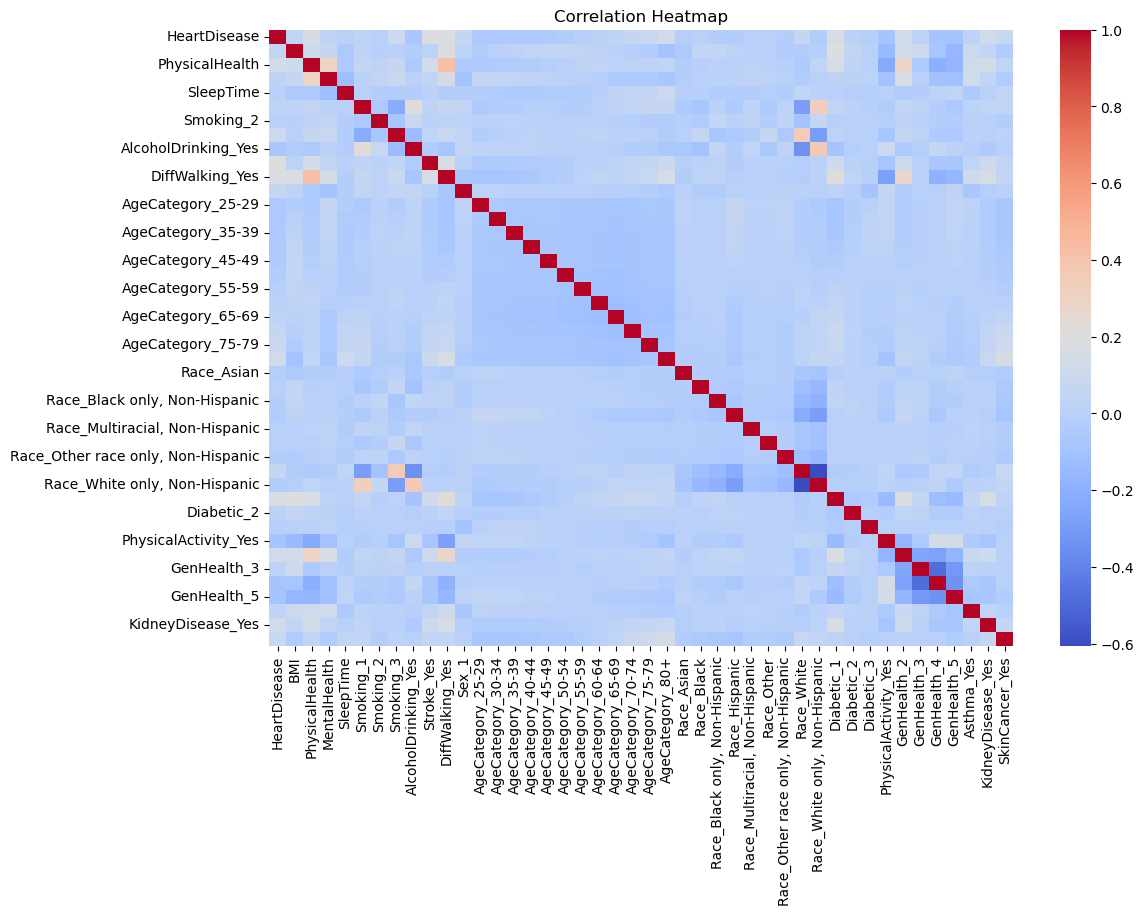

Features with low correlation to HeartDisease:
['Smoking_3', 'AgeCategory_75-79', 'SkinCancer_Yes', 'Sex_1', 'AgeCategory_70-74', 'Race_White', 'BMI', 'Asthma_Yes', 'AgeCategory_65-69', 'Smoking_1', 'MentalHealth', 'GenHealth_3', 'AgeCategory_60-64', 'Diabetic_2', 'SleepTime', 'Race_Other', 'Race_Black', 'Smoking_2', 'Race_Multiracial, Non-Hispanic', 'AgeCategory_55-59', 'Diabetic_3', 'Race_Asian', 'Race_Other race only, Non-Hispanic', 'Race_Black only, Non-Hispanic', 'AgeCategory_50-54', 'Race_White only, Non-Hispanic', 'Race_Hispanic', 'AgeCategory_45-49', 'AgeCategory_40-44', 'AgeCategory_25-29', 'AgeCategory_35-39', 'AgeCategory_30-34', 'AlcoholDrinking_Yes', 'PhysicalActivity_Yes', 'GenHealth_4', 'GenHealth_5']


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute correlations with the target variable
correlations = data_encoded.corr()['HeartDisease'].sort_values(ascending=False)
print("Correlations with HeartDisease:\n")
print(correlations)

# Step 2: Visualize correlations as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Identify features with low correlation (absolute correlation < 0.1)
low_corr_features = correlations[abs(correlations) < 0.1].index
print(f"Features with low correlation to HeartDisease:\n{list(low_corr_features)}")